In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
data=pd.read_csv("Resources/fb.csv")
data.head

<bound method DataFrame.head of       Unnamed: 0        Open        High         Low       Close   Adj Close  \
0              0   27.200001   27.650000   26.440001   26.900000   26.900000   
1              1   26.700001   27.760000   25.750000   25.870001   25.870001   
2              2   26.070000   27.170000   25.520000   26.809999   26.809999   
3              3   27.000000   27.350000   26.150000   26.309999   26.309999   
4              4   26.549999   27.760000   26.440001   27.100000   27.100000   
5              5   27.180000   28.070000   26.840000   27.010000   27.010000   
6              6   27.480000   27.770000   26.959999   27.400000   27.400000   
7              7   27.660000   28.100000   27.100000   27.270000   27.270000   
8              8   27.650000   28.320000   27.379999   28.290001   28.290001   
9              9   28.510000   30.100000   28.350000   30.010000   30.010000   
10            10   29.959999   32.080002   29.410000   31.410000   31.410000   
11      

In [5]:
# fb_data columns
data.columns

Index([u'Unnamed: 0', u'Open', u'High', u'Low', u'Close', u'Adj Close',
       u'Volume', u'ReturnsRawPrev1', u'ReturnsRawPrev5', u'ReturnsRawPrev10',
       u'ReturnsRawFut1', u'ReturnsRawFut5', u'ReturnsRawFut10', u'Year',
       u'Month', u'Week', u'Day', u'Dayofweek', u'Dayofyear', u'Is_month_end',
       u'Is_month_start', u'Is_quarter_end', u'Is_quarter_start',
       u'Is_year_end', u'Is_year_start', u'Elapsed'],
      dtype='object')

In [67]:
# Drop all data columns except the Open & Close for the purpose of the project
new_data = data [['Open', 'Close']]

In [68]:
# NA columns dropped
drop_na_df = new_data.dropna()

In [70]:
#DF for Open & close
new_data.head()

,Open,Close
0,27.200001,26.900000
1,26.700001,25.870001
2,26.070000,26.809999
3,27.000000,26.309999
4,26.549999,27.100000


In [71]:
#Assign the data to X and Y
#Note: Skleanrn requires a two-dimensional arra of values
#reshape to create

x = new_data.Open.values.reshape(-1, 1)
y = new_data.Close.values.reshape(-1, 1)

print("shape: ", x.shape, y.shape)
x

('shape: ', (1645, 1), (1645, 1))


array([[ 27.200001],
       [ 26.700001],
       [ 26.07    ],
       ...,
       [143.080002],
       [145.570007],
       [143.339996]])

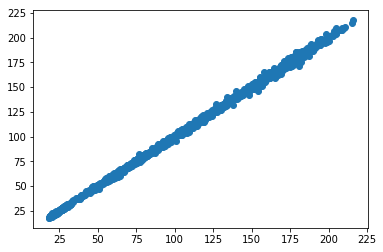

In [72]:
# Plot the data
plt.scatter(x, y)

In [73]:
# Create the model and fit the model to the data

from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [74]:
# Fit the model to the data. 
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [75]:
# Print the coefficient and the intercept for the model
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

('Weight coefficients: ', array([[1.00037152]]))
('y-axis intercept: ', array([-0.01917407]))


In [76]:
x_min = np.array([[x.min()]])
x_max = np.array([[x.max()]])

In [77]:
# Calculate the y_min and y_max using model.predict and x_min and x_max
y_min = model.predict(x_min)
y_max = model.predict(x_max)

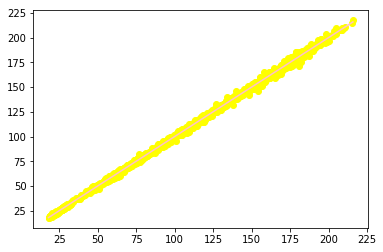

In [78]:
# Plot X and y using plt.scatter
plt.scatter(x, y, c='yellow')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='pink')

In [79]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

Text(0.5,1,'Residual Plot')

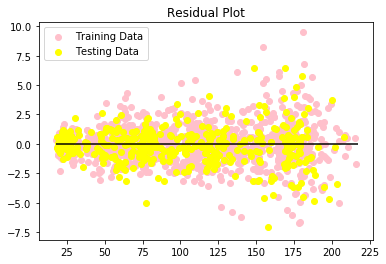

In [80]:
plt.scatter(model.predict(x_train), model.predict(x_train) - y_train, c="pink", label="Training Data")
plt.scatter(model.predict(x_test), model.predict(x_test) - y_test, c="yellow", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [81]:
X = new_data[["Open", "Close"]]
print(X.shape, y.shape)

((1645, 2), (1645, 1))


In [82]:
new_data = X.copy()

day_of_week = pd.get_dummies(data, columns=["Dayofweek"])
day_of_week.head()

,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume,ReturnsRawPrev1,ReturnsRawPrev5,ReturnsRawPrev10,...,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed,Dayofweek_0,Dayofweek_1,Dayofweek_2,Dayofweek_3,Dayofweek_4
0,0,27.200001,27.65,26.440001,26.900000,26.900000,35230300,-0.029581,-0.157004,-0.296364,...,False,False,False,False,1338768000,1,0,0,0,0
1,1,26.700001,27.76,25.750000,25.870001,25.870001,42473400,-0.038290,-0.102982,-0.239788,...,False,False,False,False,1338854400,0,1,0,0,0
2,2,26.070000,27.17,25.520000,26.809999,26.809999,61489200,0.036335,-0.048954,-0.135161,...,False,False,False,False,1338940800,0,0,1,0,0
3,3,27.000000,27.35,26.150000,26.309999,26.309999,26159500,-0.018650,-0.111149,-0.177813,...,False,False,False,False,1339027200,0,0,0,1,0
4,4,26.549999,27.76,26.440001,27.100000,27.100000,38034000,0.030027,-0.022366,-0.179534,...,False,False,False,False,1339113600,0,0,0,0,1


In [83]:
new_data = X.copy()

day_of_week = pd.get_dummies(data)
day_of_week.head()

,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume,ReturnsRawPrev1,ReturnsRawPrev5,ReturnsRawPrev10,...,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
0,0,27.200001,27.65,26.440001,26.900000,26.900000,35230300,-0.029581,-0.157004,-0.296364,...,4,0,156,False,False,False,False,False,False,1338768000
1,1,26.700001,27.76,25.750000,25.870001,25.870001,42473400,-0.038290,-0.102982,-0.239788,...,5,1,157,False,False,False,False,False,False,1338854400
2,2,26.070000,27.17,25.520000,26.809999,26.809999,61489200,0.036335,-0.048954,-0.135161,...,6,2,158,False,False,False,False,False,False,1338940800
3,3,27.000000,27.35,26.150000,26.309999,26.309999,26159500,-0.018650,-0.111149,-0.177813,...,7,3,159,False,False,False,False,False,False,1339027200
4,4,26.549999,27.76,26.440001,27.100000,27.100000,38034000,0.030027,-0.022366,-0.179534,...,8,4,160,False,False,False,False,False,False,1339113600


In [84]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,Open,Close
1539,204.899994,209.990005
495,60.410000,61.349998
1260,153.270004,153.119995
832,93.059998,94.410004
380,48.980000,47.939999
